<a href="https://colab.research.google.com/github/mohameddhameem/TensorflowCertification/blob/main/AdvancedCNN/Exercise_8_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [2]:
uploaded=files.upload()

Saving sign_mnist_test.csv to sign_mnist_test.csv
Saving sign_mnist_train.csv to sign_mnist_train.csv


In [35]:
def get_data(filename):
    with open(filename) as training_file:
        csv_reader = csv.reader(training_file, delimiter=',')
        first_line = True
        temp_images = []
        temp_labels = []
        for row in csv_reader:
            if first_line:
                # print("Ignoring first line")
                first_line = False
            else:
                temp_labels.append(row[0])
                image_data = row[1:785]
                image_data_as_array = np.array_split(image_data, 28)
                temp_images.append(image_data_as_array)
        images = np.array(temp_images).astype('float')
        labels = np.array(temp_labels).astype('float')
    return images, labels
training_images, training_labels = get_data('sign_mnist_train.csv')

In [39]:
print(training_labels)
training_images

[ 3.  6.  2. ... 18. 17. 23.]


array([[[107., 118., 127., ..., 170., 170., 169.],
        [111., 121., 129., ..., 171., 171., 170.],
        [113., 123., 131., ..., 171., 171., 171.],
        ...,
        [142., 150., 159., ..., 202., 201., 200.],
        [142., 151., 160., ..., 204., 203., 202.],
        [142., 151., 160., ..., 204., 203., 202.]],

       [[155., 157., 156., ..., 138.,  92., 108.],
        [158., 159., 159., ..., 142., 116., 143.],
        [161., 161., 161., ..., 147., 125., 140.],
        ...,
        [162., 159., 145., ...,  91., 101.,  94.],
        [153., 139., 115., ...,  97.,  95., 120.],
        [135., 116.,  95., ..., 103., 135., 149.]],

       [[187., 188., 188., ...,  66.,  77.,  83.],
        [188., 189., 189., ...,  73.,  73.,  71.],
        [190., 190., 190., ...,  74.,  68.,  61.],
        ...,
        [212., 198., 175., ..., 195., 193., 192.],
        [202., 179., 152., ..., 195., 194., 193.],
        [198., 166., 132., ..., 195., 194., 195.]],

       ...,

       [[174., 174., 174

In [38]:
import pandas as pd
df_train = pd.read_csv('sign_mnist_train.csv')
print(df_train.head())
label = df_train.label.values.astype('float').reshape(-1)
print(label)
pixel = df_train.drop(columns=['label']).values.astype('float').reshape(-1,28,28)
pixel

   label  pixel1  pixel2  pixel3  ...  pixel781  pixel782  pixel783  pixel784
0      3     107     118     127  ...       206       204       203       202
1      6     155     157     156  ...       175       103       135       149
2      2     187     188     188  ...       198       195       194       195
3      2     211     211     212  ...       225       222       229       163
4     13     164     167     170  ...       157       163       164       179

[5 rows x 785 columns]
[ 3.  6.  2. ... 18. 17. 23.]


array([[[107., 118., 127., ..., 170., 170., 169.],
        [111., 121., 129., ..., 171., 171., 170.],
        [113., 123., 131., ..., 171., 171., 171.],
        ...,
        [142., 150., 159., ..., 202., 201., 200.],
        [142., 151., 160., ..., 204., 203., 202.],
        [142., 151., 160., ..., 204., 203., 202.]],

       [[155., 157., 156., ..., 138.,  92., 108.],
        [158., 159., 159., ..., 142., 116., 143.],
        [161., 161., 161., ..., 147., 125., 140.],
        ...,
        [162., 159., 145., ...,  91., 101.,  94.],
        [153., 139., 115., ...,  97.,  95., 120.],
        [135., 116.,  95., ..., 103., 135., 149.]],

       [[187., 188., 188., ...,  66.,  77.,  83.],
        [188., 189., 189., ...,  73.,  73.,  71.],
        [190., 190., 190., ...,  74.,  68.,  61.],
        ...,
        [212., 198., 175., ..., 195., 193., 192.],
        [202., 179., 152., ..., 195., 194., 193.],
        [198., 166., 132., ..., 195., 194., 195.]],

       ...,

       [[174., 174., 174

In [49]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
      # Your code starts here
      df = pd.read_csv(filename)
      labels = df.label.values.astype('float').reshape(-1)
      images = df.drop(columns=['label']).astype('float').values.reshape(-1,28,28)
      # Your code ends here
    return images, labels


training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [50]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images,axis=3)
testing_images = np.expand_dims(testing_images, axis=3)# Your Code Here

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
    )

validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    )
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [51]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    # Your Code Here
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
]
    )

# Compile Model. 
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
print(model.summary())
# Train the Model
history = model.fit(train_datagen.flow(training_images, training_labels, batch_size=32),
                              steps_per_epoch=len(training_images) / 32,
                              epochs=15,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)

model.evaluate(testing_images, testing_labels)
    
# The output from model.evaluate should be close to:
[6.92426086682151, 0.56609035]


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 1600)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)             

[6.92426086682151, 0.56609035]

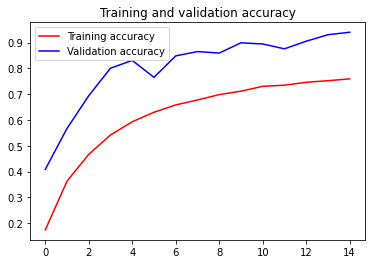

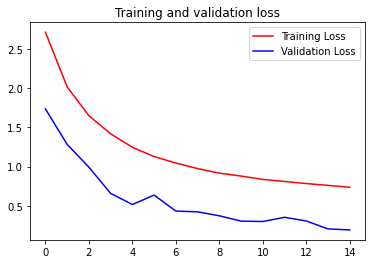

In [53]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()